In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# Question 3


## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [3]:
image = cv2.imread('image.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(image, output_image)

(-0.5, 383.5, 287.5, -0.5)

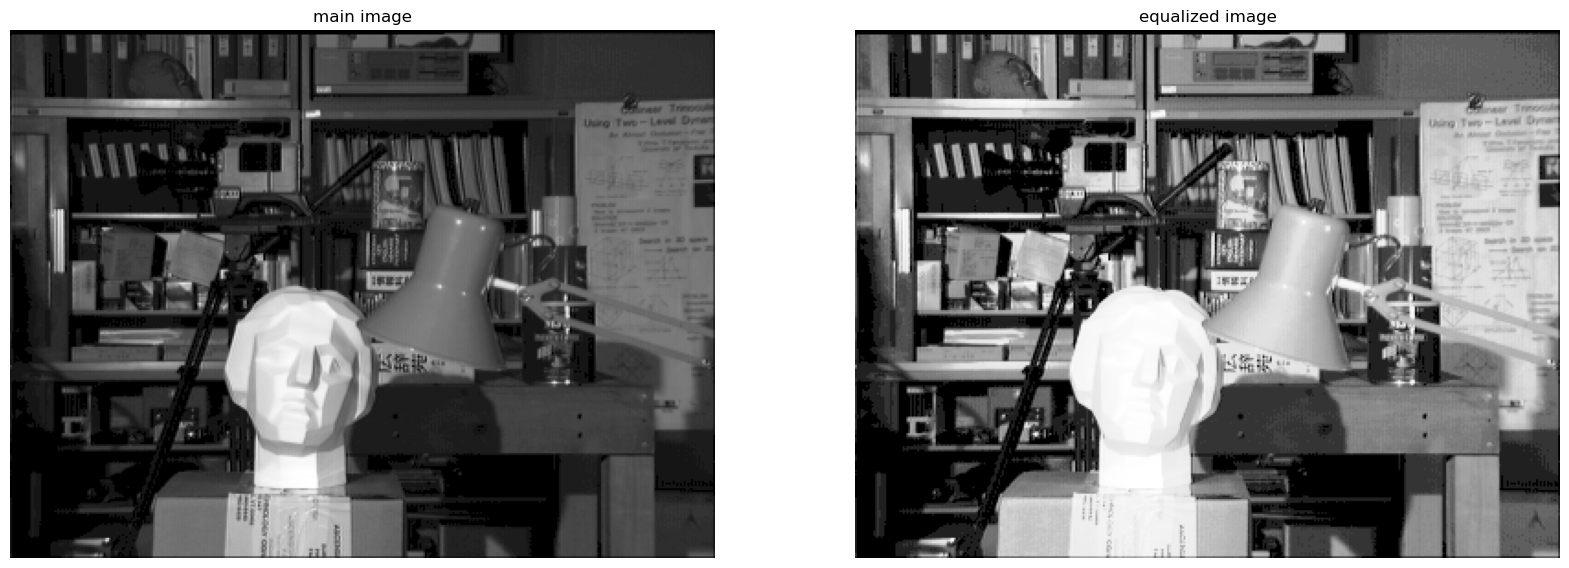

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b1


<h3> in this section we want to implement the first method for ACE </h3>
<h3> you are free to use opencv library </h3>


In [5]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x, y = image.shape
  output_image = image.copy()
  
  for i in range(0, x, gridSize):
    for j in range(0, y, gridSize):
      grid = image[i:i+gridSize, j:j+gridSize]
      equalized_grid = cv2.equalizeHist(grid)
      output_image[i:i+gridSize, j:j+gridSize] = equalized_grid

  return output_image

(-0.5, 383.5, 287.5, -0.5)

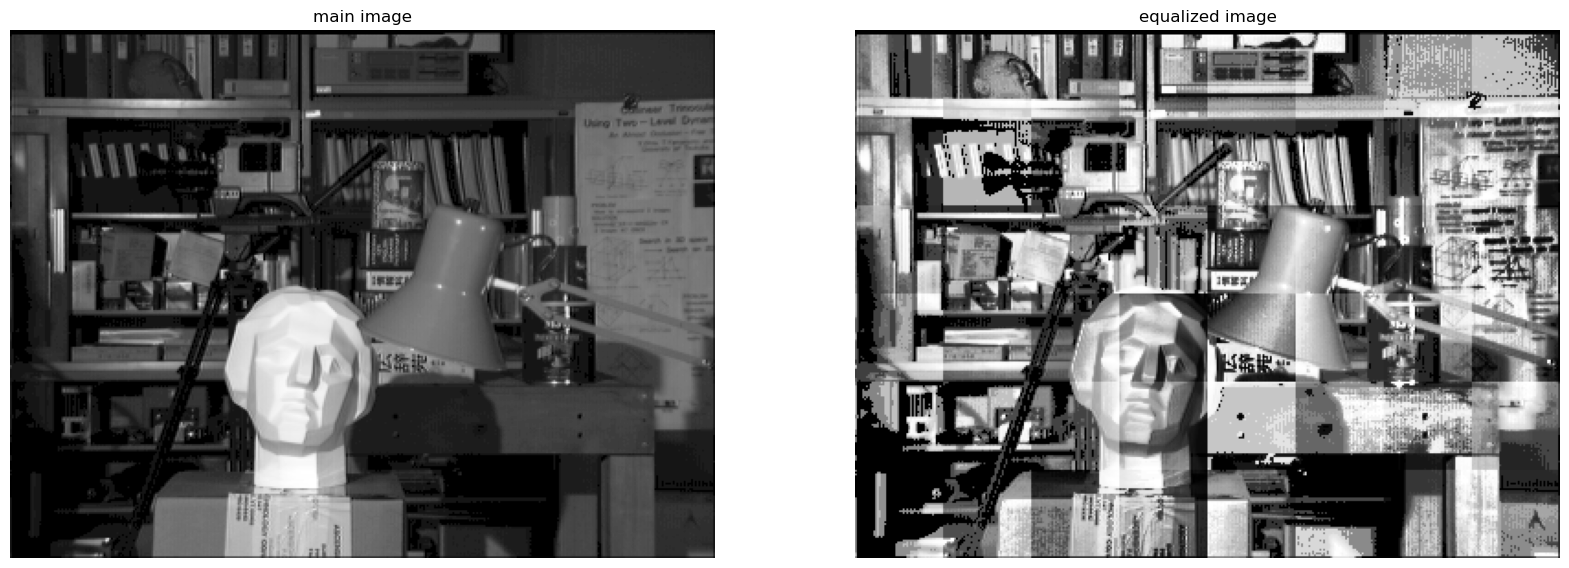

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b2

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you are free to use opencv library </h3>

In [7]:
def ACE2(image, gridSize):
  '''
  you can just use the equalize function of OpenCV for each grid
  You can use OpenCV built-in tools for applying padding
  Use second method for ACE implementation (calculating transition function for each pixel)
  input(s):
    image (ndarray): input image
    gridSize (tuple): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x, y = image.shape
  output = image.copy()
  grid_x, grid_y = gridSize

  padded_image = cv2.copyMakeBorder(image, grid_x//2, grid_x//2, grid_y//2, grid_y//2, cv2.BORDER_REFLECT)

  for i in range(x):
    for j in range(y):
      grid = padded_image[i:i+grid_x, j:j+grid_y]
      equalized_grid = cv2.equalizeHist(grid)
      output[i, j] = equalized_grid[grid_x//2, grid_y//2]

  return output

(-0.5, 383.5, 287.5, -0.5)

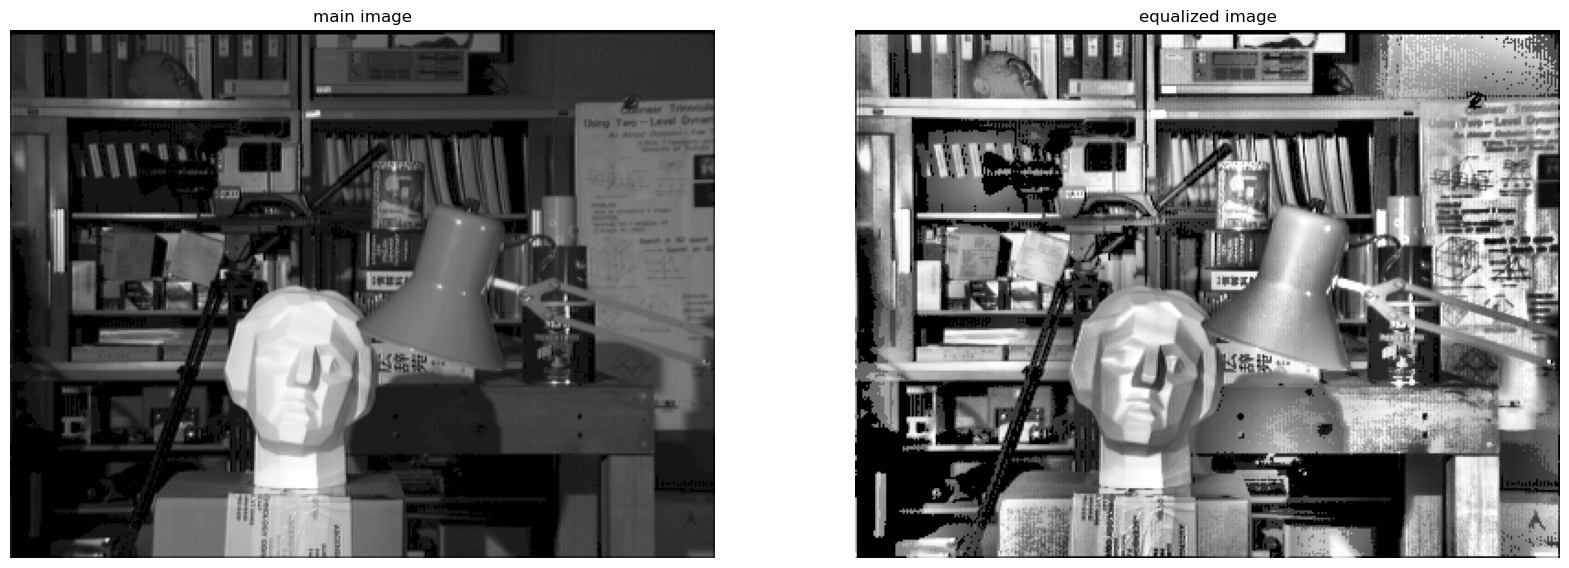

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b3

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [9]:
def CLAHE(image, gridSize, clip_limit):
  '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
  x, y = image.shape
  output = np.zeros_like(image)
  grid_x, grid_y = gridSize

  padded_image = cv2.copyMakeBorder(image, grid_x//2, grid_x//2, grid_y//2, grid_y//2, cv2.BORDER_REFLECT)

  for i in range(x):
    for j in range(y):
      grid = padded_image[i:i+grid_x, j:j+grid_y]
      hist, bins = np.histogram(grid.flatten(), 256, [0,256])
      
      excess = np.maximum(hist - clip_limit, 0)
      hist = np.minimum(hist, clip_limit)
      excess_total = np.sum(excess)
      hist += excess_total // 256
      hist[:excess_total % 256] += 1
      
      cdf = hist.cumsum()
      cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
      cdf = cdf.astype('uint8')
      
      output[i, j] = cdf[grid[grid_x//2, grid_y//2]]

  return output

(-0.5, 383.5, 287.5, -0.5)

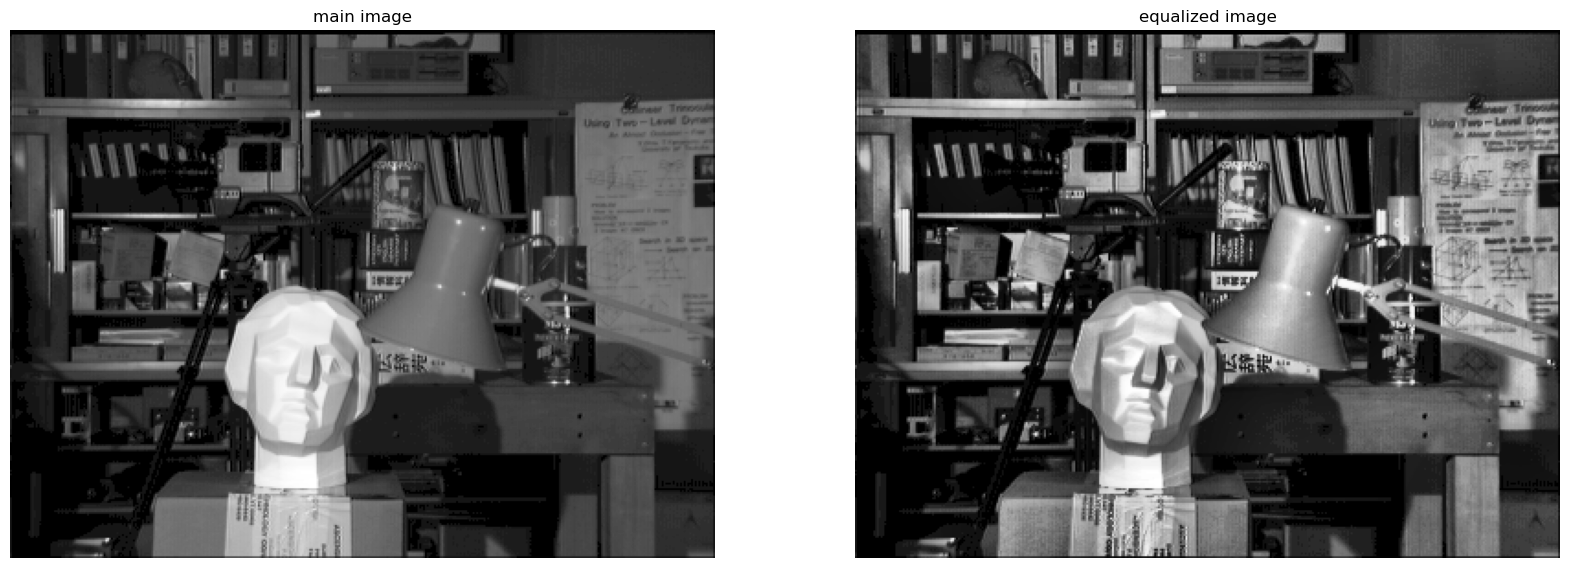

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

# part c


<h3> in this section we want to implement CLAHE using opencv </h3>


In [11]:
def CLAHE(image, gridSize, clipLimit):
    '''
    use opencv library for CLAHE.
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    clahe = cv2.createCLAHE(clipLimit ,gridSize)
    clahe_output = clahe.apply(image)

    
    return clahe_output

<h3> run the following sections to answer part c </h3>


(-0.5, 383.5, 287.5, -0.5)

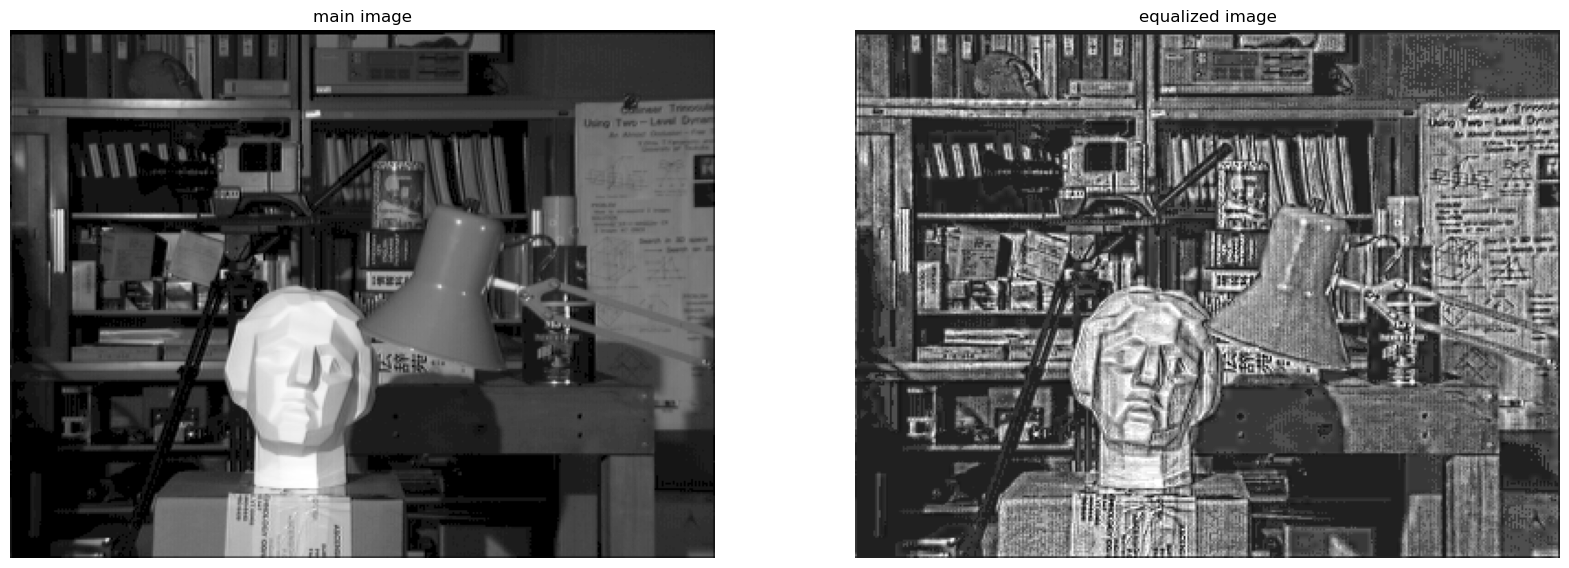

In [12]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image1 = CLAHE(image,(128,128), 2)
plt.imshow(output_image1, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

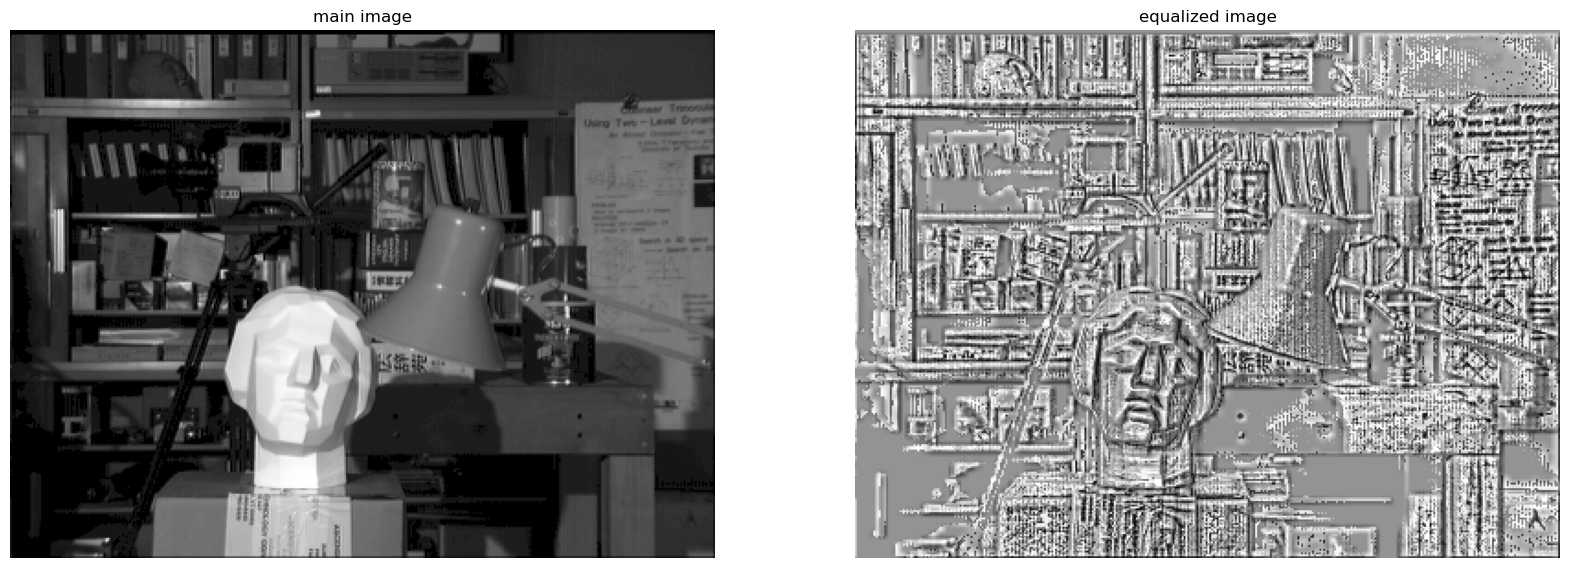

In [13]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image2 = CLAHE(image,(128,128), 128)
plt.imshow(output_image2, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

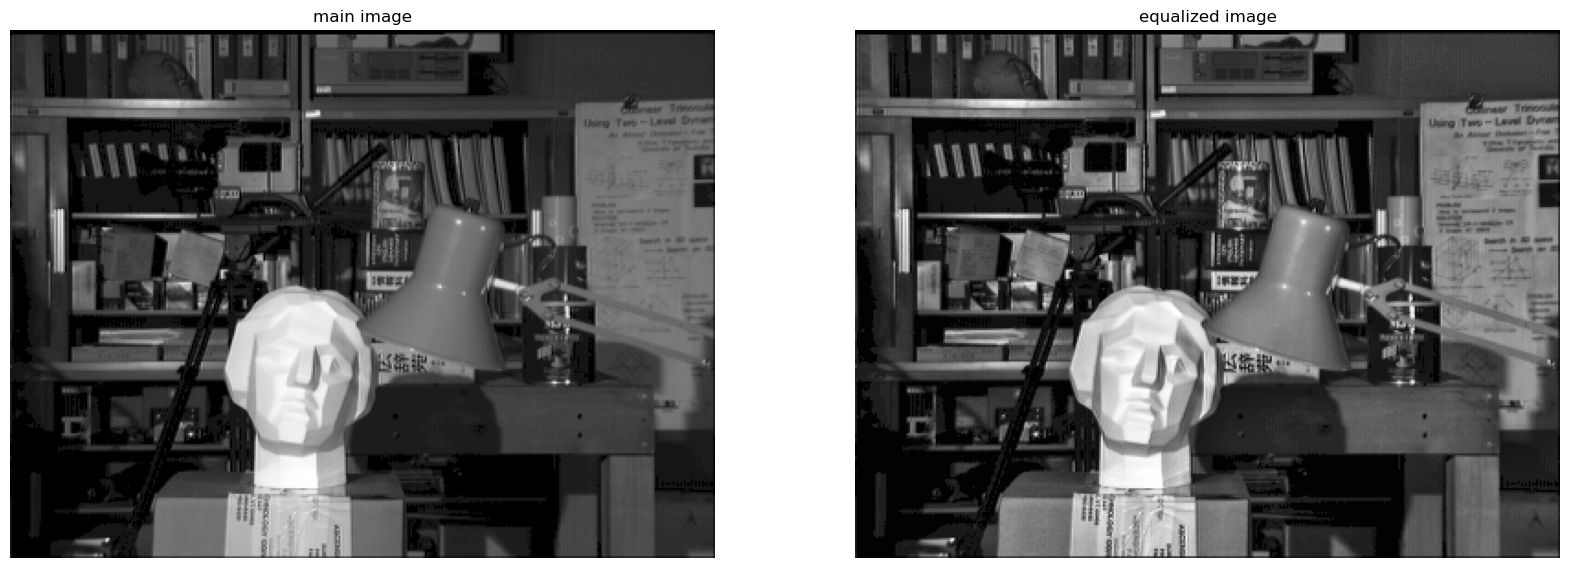

In [14]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image3 = CLAHE(image,(16,16), 2)
plt.imshow(output_image3, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

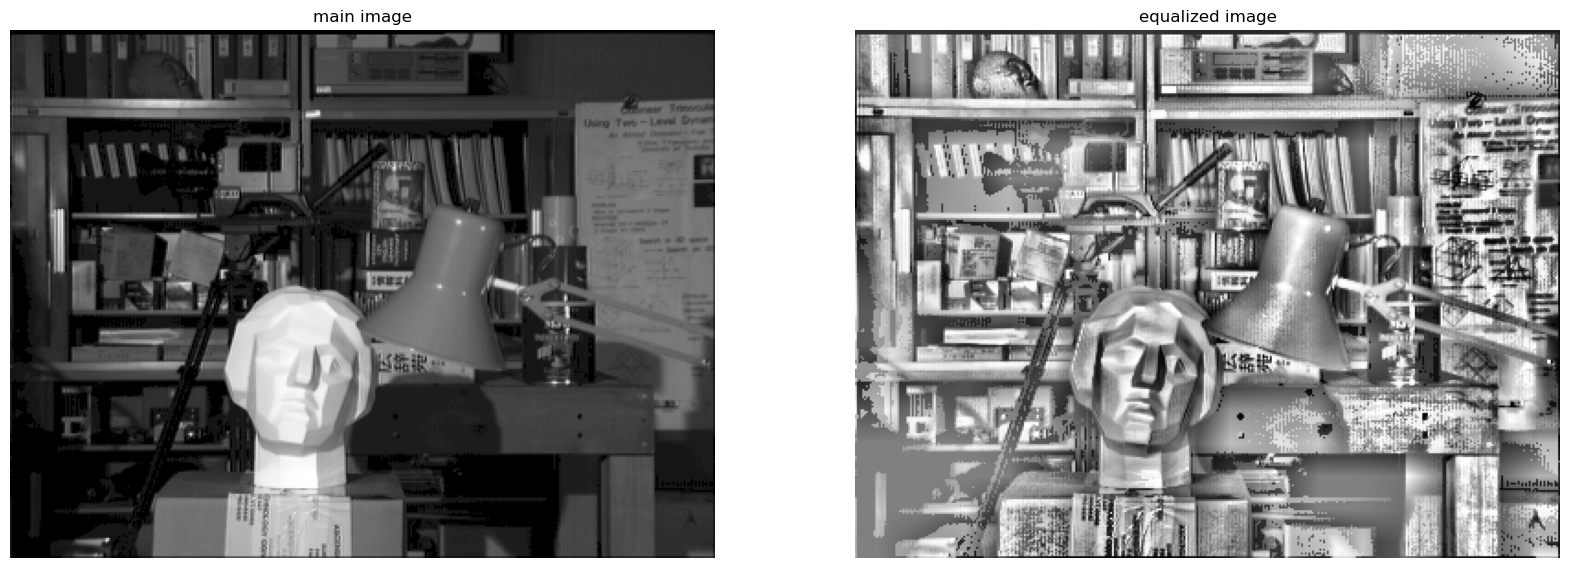

In [15]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image4 = CLAHE(image,(16,16), 128)
plt.imshow(output_image4, cmap='gray')
plt.title('equalized image')
plt.axis('off')
